In [1]:
import importlib
import gmft
import gmft.table_detection
import gmft.table_visualization
import gmft.table_function
import gmft.table_function_algorithm
import gmft.table_captioning
import gmft.pdf_bindings.bindings_pdfium
import gmft.pdf_bindings
import gmft.common

importlib.reload(gmft)
importlib.reload(gmft.common)
importlib.reload(gmft.table_captioning)
importlib.reload(gmft.table_detection)
importlib.reload(gmft.table_visualization)
importlib.reload(gmft.table_function)
importlib.reload(gmft.table_function_algorithm)
importlib.reload(gmft.pdf_bindings.bindings_pdfium)
importlib.reload(gmft.pdf_bindings)

<module 'gmft.pdf_bindings' from 'c:\\Users\\cgtyk\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\gmft\\pdf_bindings\\__init__.py'>

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json

In [2]:
from gmft.pdf_bindings import PyPDFium2Document
from gmft.auto import CroppedTable, AutoTableDetector

detector = AutoTableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)

    tables = []
    for page in doc:
        tables += detector.extract(page)
    return tables, doc

config.json:   0%|          | 0.00/76.5k [00:00<?, ?B/s]

c:\Users\cgtyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cgtyk\.cache\huggingface\hub\models--microsoft--table-transformer-detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

In [3]:
tables, doc = ingest_pdf('2023-Yillik-Ekonomik-Rapor.pdf')
len(tables)

16

In [ ]:
from PIL import Image

for table in tables:
    print("Visualizing table...")
    img = table.visualize(figsize=(10, 6))  # Görselleştirmeyi elde et
    if img:  # Eğer img None değilse
        img.save(f'table_{tables.index(table)}.png')  # Resmi kaydet
        print(f"Table {tables.index(table)} saved as table_{tables.index(table)}.png")
    else:
        print(f"Table {tables.index(table)} returned None.")


In [46]:
from gmft import AutoTableFormatter

formatter = AutoTableFormatter()

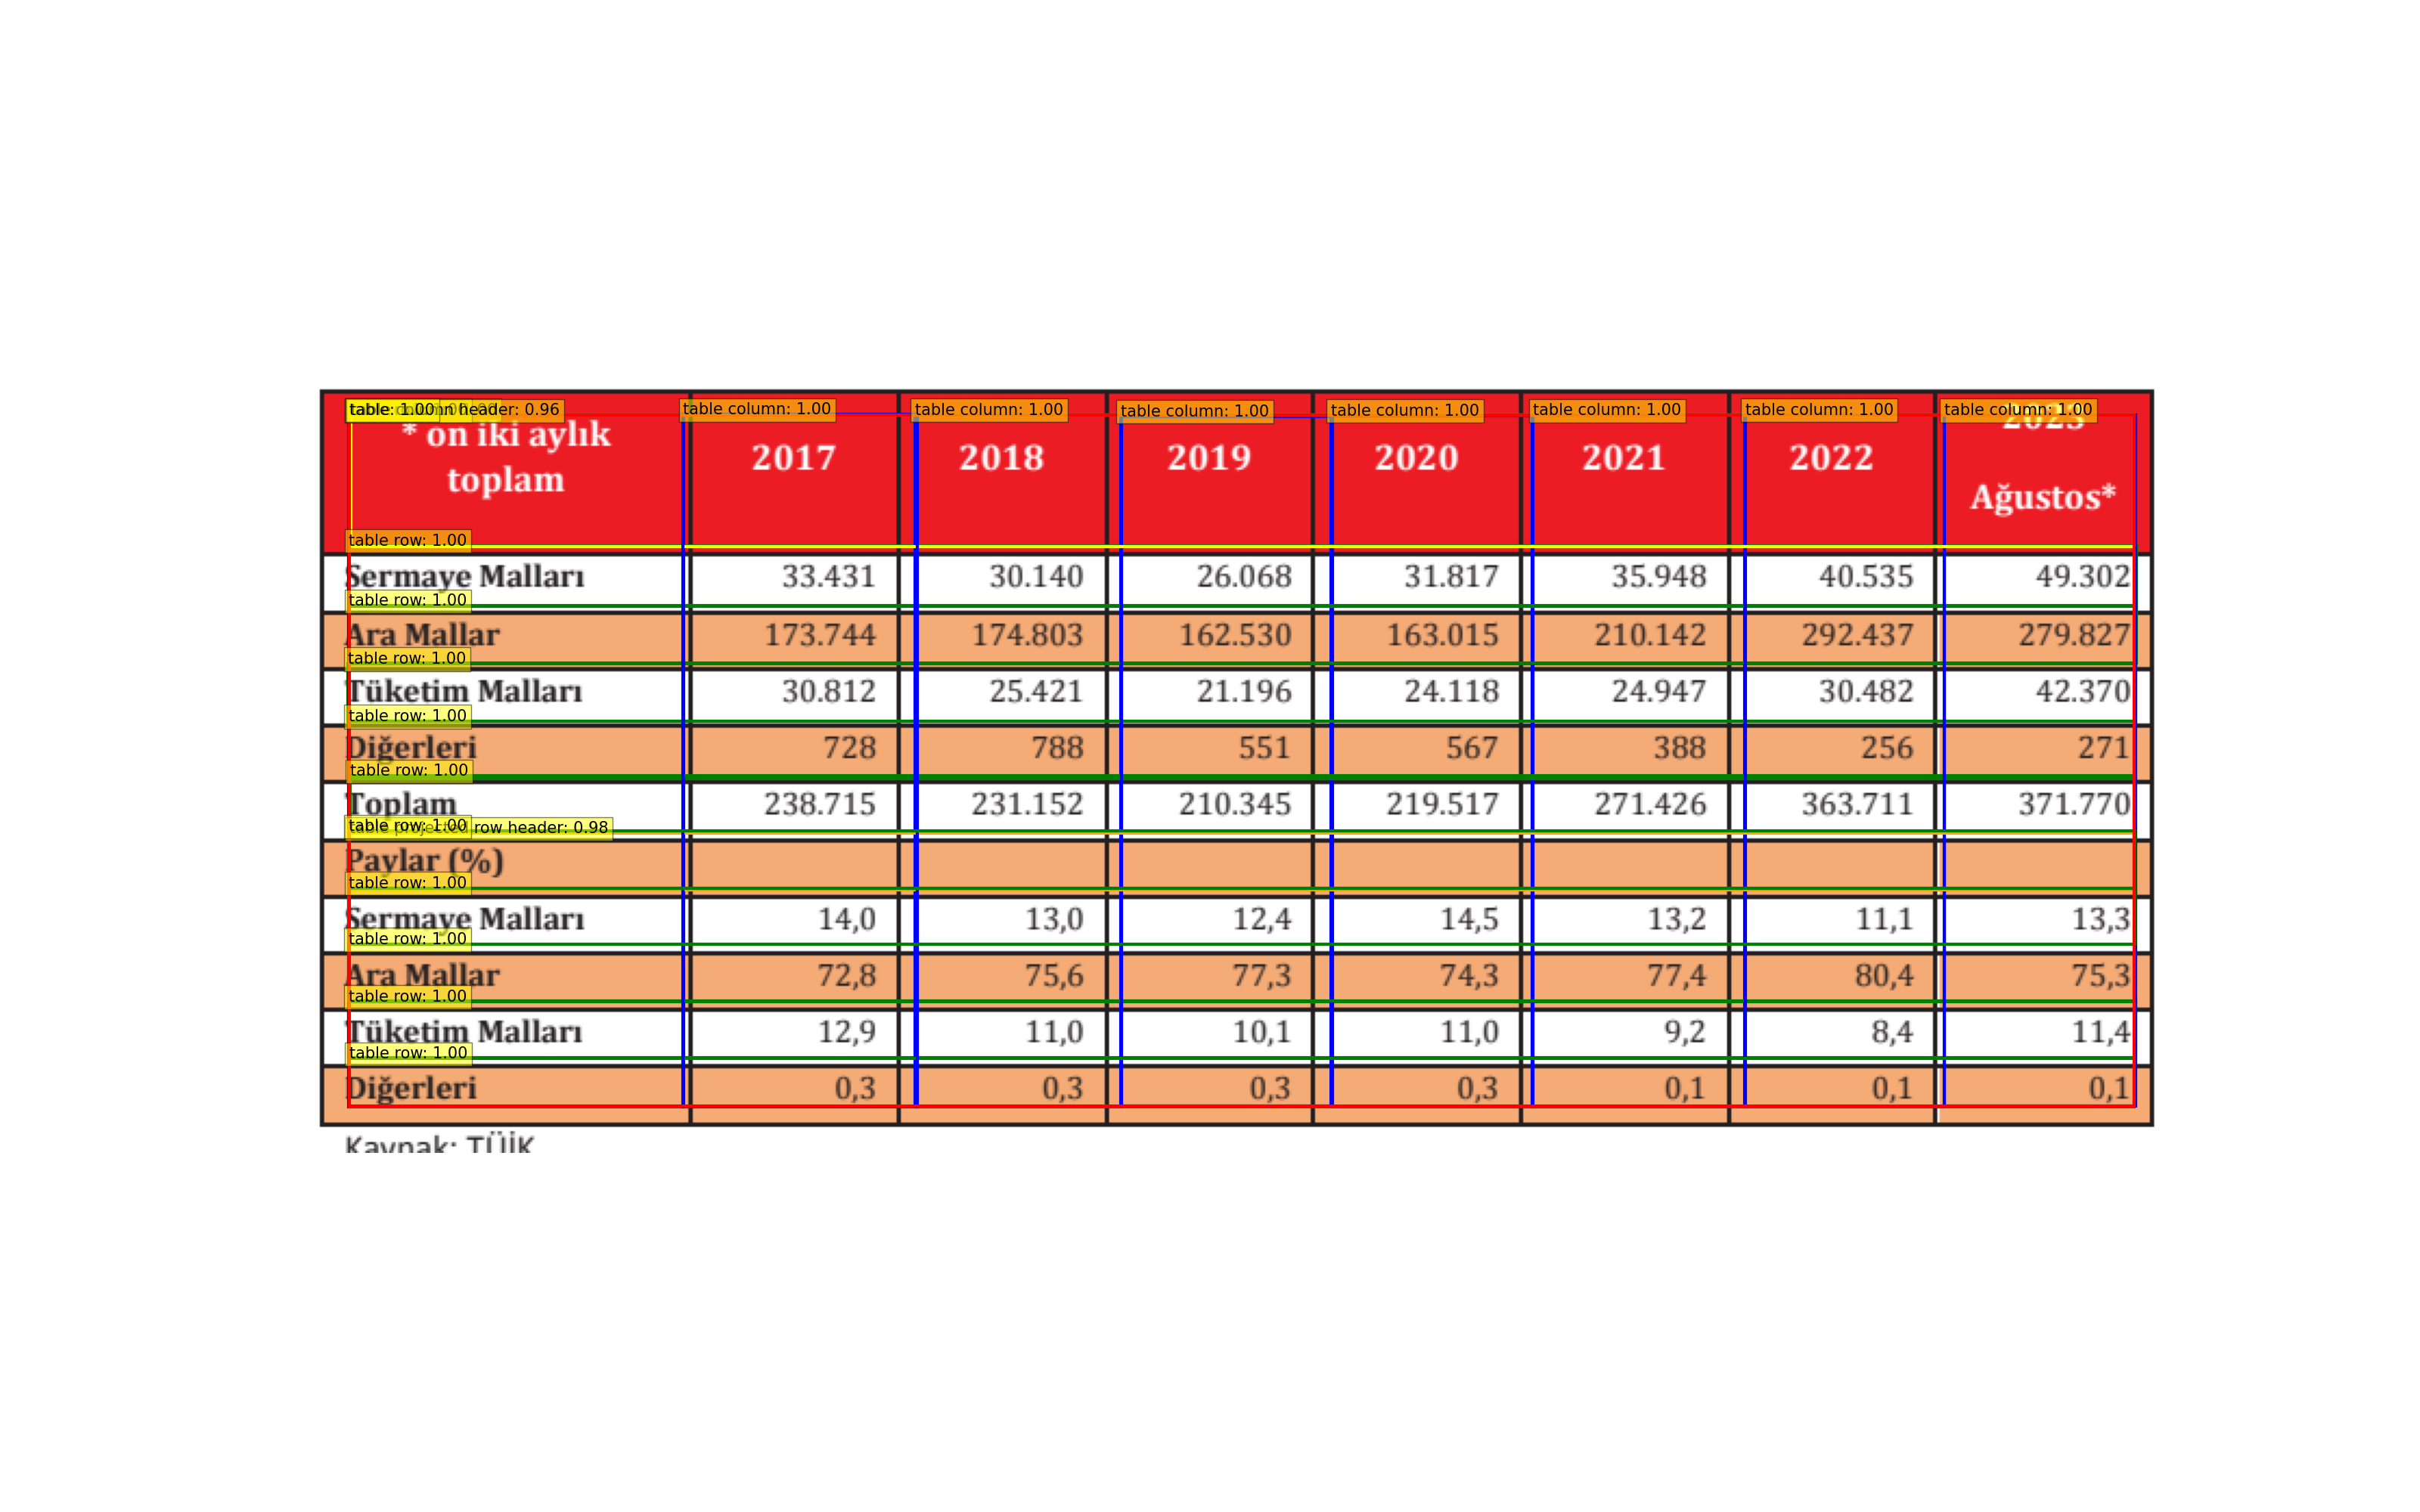

In [21]:
ft = formatter.extract(tables[11])
ft.visualize()

In [28]:
ft.df().fillna('')

,* on iki aylık toplam,2017,2018,2019,2020,2021,2022,2023 Ağustos*
0,Sermaye Malları,33.431,30.140,26.068,31.817,35.948,40.535,49.302
1,Ara Mallar,173.744,174.803,162.530,163.015,210.142,292.437,279.827
2,Tüketim Malları,30.812,25.421,21.196,24.118,24.947,30.482,42.370
3,Diğerleri,728,788,551,567,388,256,271
4,Toplam,238.715,231.152,210.345,219.517,271.426,363.711,371.770
5,Paylar (%),,,,,,,
6,Sermaye Malları,"14,0","13,0","12,4","14,5","13,2","11,1","13,3"
7,Ara Mallar,"72,8","75,6","77,3","74,3","77,4","80,4","75,3"
8,Tüketim Malları,"12,9","11,0","10,1","11,0","9,2","8,4","11,4"
9,Diğerleri,"0,3","0,3","0,3","0,3","0,1","0,1","0,1"


In [25]:
from gmft.detectors.tatr import TATRDetector
from gmft.formatters.common import FormattedTable, TableFormatter
from gmft.table_visualization import display_html_and_image
from gmft.auto import AutoFormatConfig


config_hdr = AutoFormatConfig() # config may be passed like so
config_hdr.verbosity = 3
config_hdr.enable_multi_header = True
config_hdr.semantic_spanning_cells = True 



In [27]:
import pandas as pd

with pd.option_context('display.multi_sparse', False):
    display(ft.df(config_overrides=config_hdr))

,* on iki aylık toplam,2017,2018,2019,2020,2021,2022,2023 Ağustos*
0,Sermaye Malları,33.431,30.140,26.068,31.817,35.948,40.535,49.302
1,Ara Mallar,173.744,174.803,162.530,163.015,210.142,292.437,279.827
2,Tüketim Malları,30.812,25.421,21.196,24.118,24.947,30.482,42.370
3,Diğerleri,728,788,551,567,388,256,271
4,Toplam,238.715,231.152,210.345,219.517,271.426,363.711,371.770
5,Paylar (%),None,None,None,None,None,None,None
6,Sermaye Malları,"14,0","13,0","12,4","14,5","13,2","11,1","13,3"
7,Ara Mallar,"72,8","75,6","77,3","74,3","77,4","80,4","75,3"
8,Tüketim Malları,"12,9","11,0","10,1","11,0","9,2","8,4","11,4"
9,Diğerleri,"0,3","0,3","0,3","0,3","0,1","0,1","0,1"


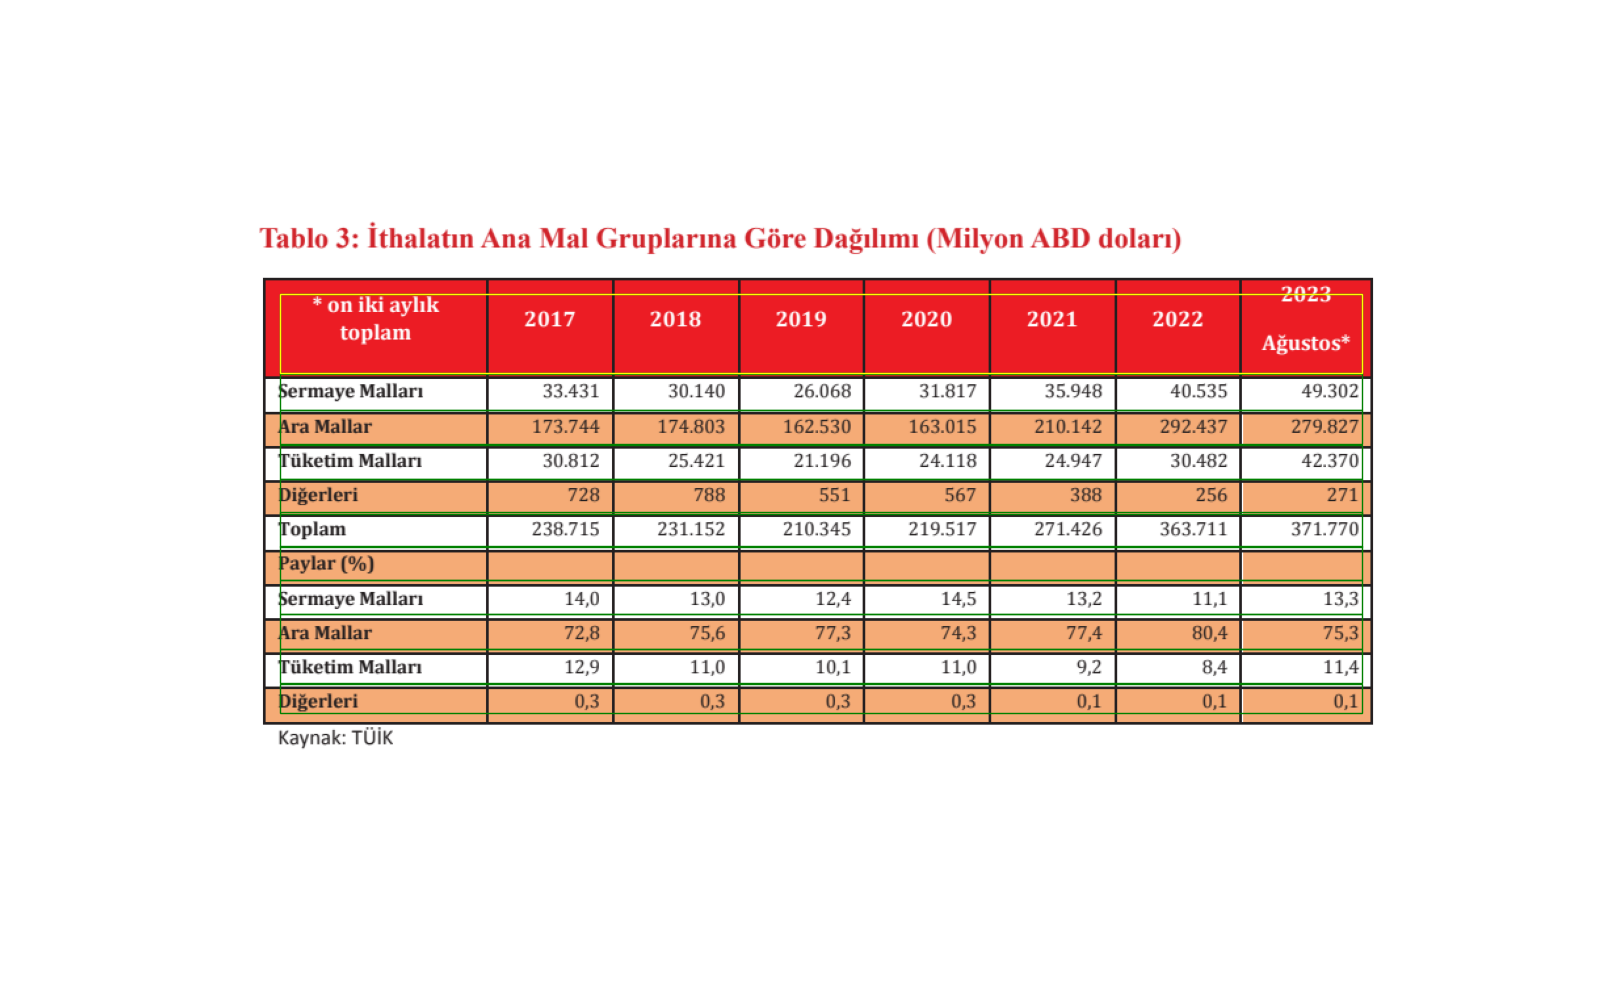

In [29]:
ft.visualize(filter=[2,3], effective=True, margin='auto', figsize=(16, 10), show_labels=False, linewidth=1)

In [30]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ft.df().fillna(""))

,* on iki aylık toplam,2017,2018,2019,2020,2021,2022,2023 Ağustos*
0,Sermaye Malları,33.431,30.140,26.068,31.817,35.948,40.535,49.302
1,Ara Mallar,173.744,174.803,162.530,163.015,210.142,292.437,279.827
2,Tüketim Malları,30.812,25.421,21.196,24.118,24.947,30.482,42.370
3,Diğerleri,728,788,551,567,388,256,271
4,Toplam,238.715,231.152,210.345,219.517,271.426,363.711,371.770
5,Paylar (%),,,,,,,
6,Sermaye Malları,"14,0","13,0","12,4","14,5","13,2","11,1","13,3"
7,Ara Mallar,"72,8","75,6","77,3","74,3","77,4","80,4","75,3"
8,Tüketim Malları,"12,9","11,0","10,1","11,0","9,2","8,4","11,4"
9,Diğerleri,"0,3","0,3","0,3","0,3","0,1","0,1","0,1"


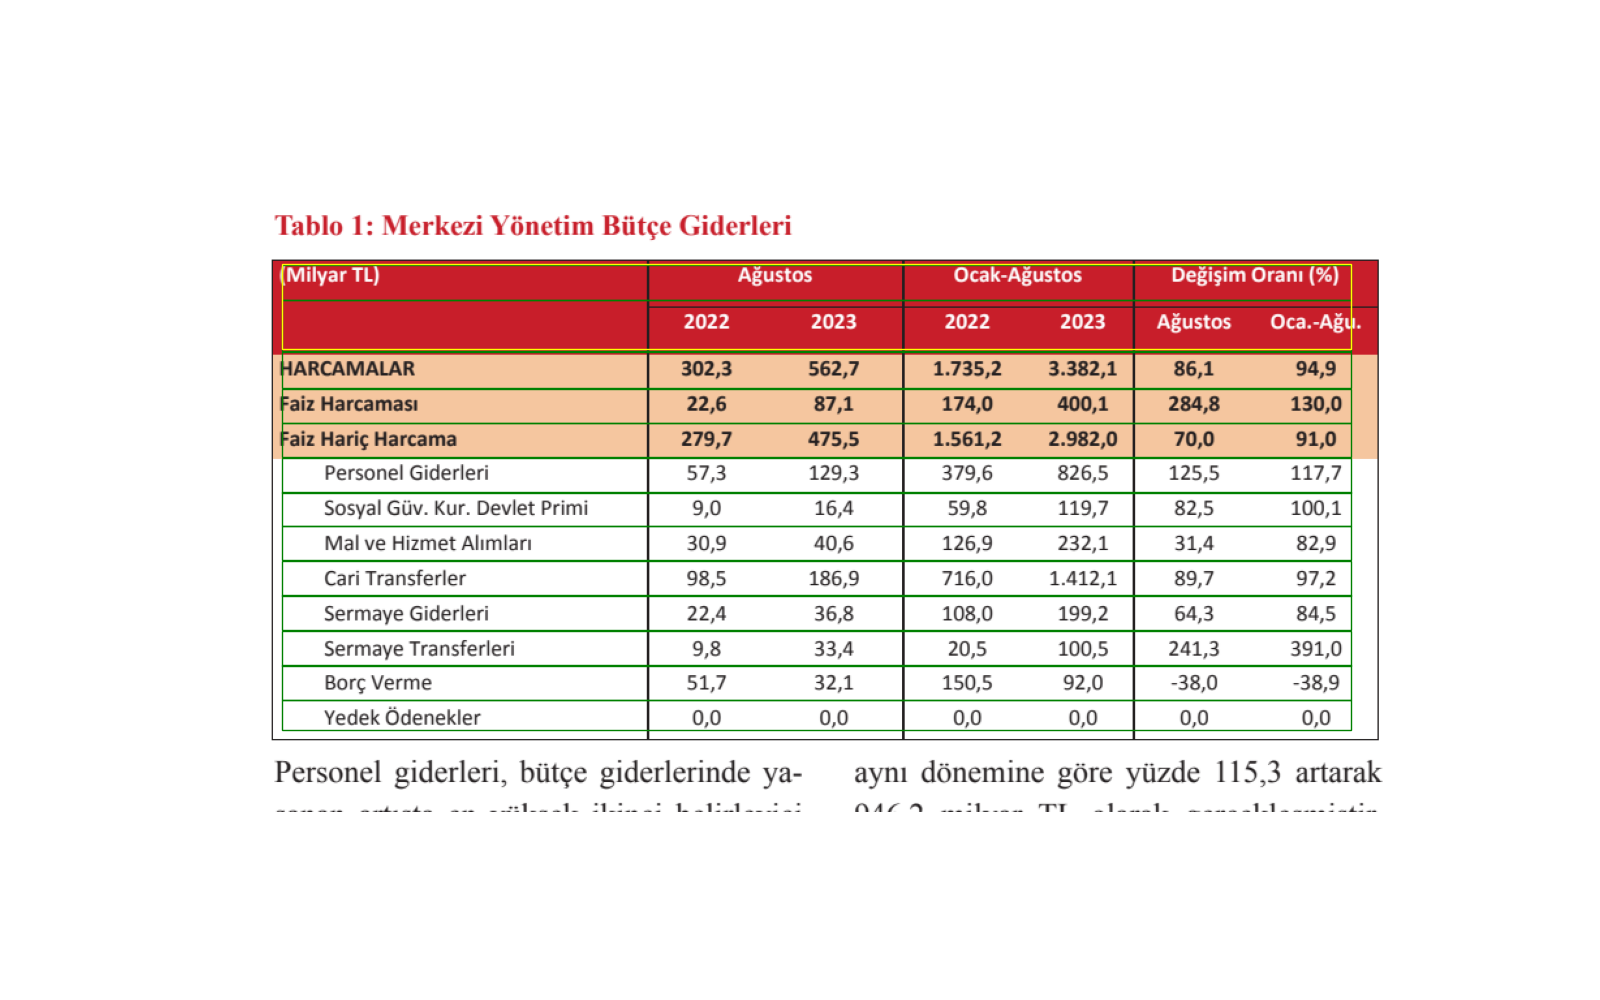

In [33]:
ft1 = formatter.extract(tables[5], margin='auto', padding=None)
ft1.visualize(filter=[2,3], effective=False, margin='auto', figsize=(16, 10), show_labels=False, linewidth=1)

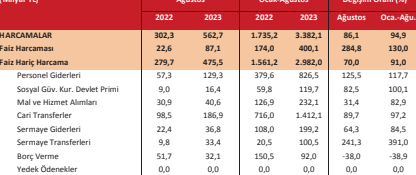

Header 2                    (Milyar TL) Ağustos        Ocak-Ağustos           \
Header 1                            NaN    2022   2023         2022     2023   
0                            HARCAMALAR   302,3  562,7      1.735,2  3.382,1   
1                        Faiz Harcaması    22,6   87,1        174,0    400,1   
2                    Faiz Hariç Harcama   279,7  475,5      1.561,2  2.982,0   
3                    Personel Giderleri    57,3  129,3        379,6    826,5   
4         Sosyal Güv. Kur. Devlet Primi     9,0   16,4         59,8    119,7   
5                Mal ve Hizmet Alımları    30,9   40,6        126,9    232,1   
6                      Cari Transferler    98,5  186,9        716,0  1.412,1   
7                     Sermaye Giderleri    22,4   36,8        108,0    199,2   
8                  Sermaye Transferleri     9,8   33,4         20,5    100,5   
9                            Borç Verme    51,7   32,1        150,5     92,0   
10                      Yedek Ödenekler     0,0    0,0          0,0      0,0   

Header 2 Değişim Oranı (%)            
Header 1           Ağustos Oca.-Ağu.  
0                     86,1      94,9  
1                    284,8     130,0  
2                     70,0      91,0  
3                    125,5     117,7  
4                     82,5     100,1  
5                     31,4      82,9  
6                     89,7      97,2  
7                     64,3      84,5  
8                    241,3     391,0  
9                    -38,0     -38,9  
10                     0,0       0,0

In [ ]:
# çok başlıklı tablolar için iyi oldu. bunu algoritma olarak kullanabiliriz.

ft = formatter.extract(tables[5], margin='auto', padding=None)
display(ft.image())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ft.df(config_overrides=config_hdr).fillna("")) 

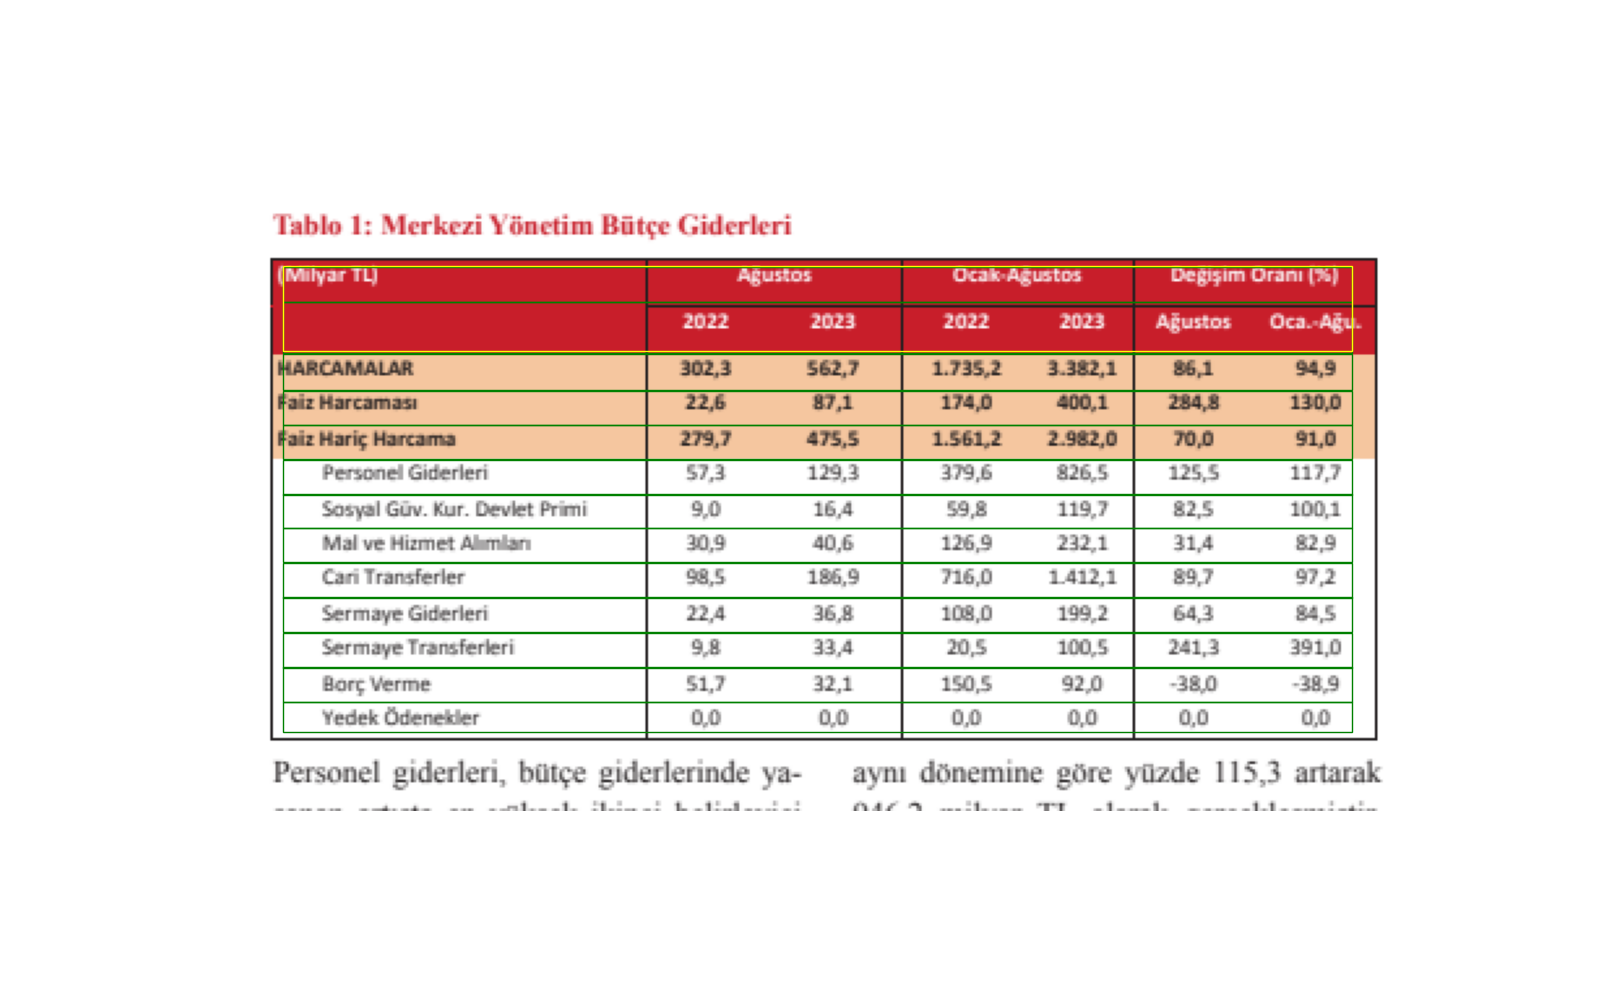

In [44]:
ft.visualize(filter=[2,3], effective=True, margin='auto', figsize=(16, 10), show_labels=False, linewidth=1)

In [41]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ft1.df().fillna(""))

,(Milyar TL),2022,Ağustos \n2023,Ocak-Ağustos \n2022,2023,Değişim \nAğustos,Oranı (%) \nOca.-Ağu.
0,HARCAMALAR,"302,3","562,7","1.735,2","3.382,1","86,1","94,9"
1,Faiz Harcaması,"22,6","87,1","174,0","400,1","284,8","130,0"
2,Faiz Hariç Harcama,"279,7","475,5","1.561,2","2.982,0","70,0","91,0"
3,Personel Giderleri,"57,3","129,3","379,6","826,5","125,5","117,7"
4,Sosyal Güv. Kur. Devlet Primi,"9,0","16,4","59,8","119,7","82,5","100,1"
5,Mal ve Hizmet Alımları,"30,9","40,6","126,9","232,1","31,4","82,9"
6,Cari Transferler,"98,5","186,9","716,0","1.412,1","89,7","97,2"
7,Sermaye Giderleri,"22,4","36,8","108,0","199,2","64,3","84,5"
8,Sermaye Transferleri,"9,8","33,4","20,5","100,5","241,3","391,0"
9,Borç Verme,"51,7","32,1","150,5","92,0","-38,0","-38,9"


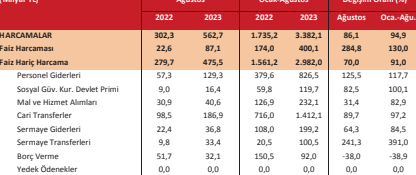

Header 2                    (Milyar TL) Ağustos        Ocak-Ağustos           \
Header 1                            NaN    2022   2023         2022     2023   
0                            HARCAMALAR   302,3  562,7      1.735,2  3.382,1   
1                        Faiz Harcaması    22,6   87,1        174,0    400,1   
2                    Faiz Hariç Harcama   279,7  475,5      1.561,2  2.982,0   
3                    Personel Giderleri    57,3  129,3        379,6    826,5   
4         Sosyal Güv. Kur. Devlet Primi     9,0   16,4         59,8    119,7   
5                Mal ve Hizmet Alımları    30,9   40,6        126,9    232,1   
6                      Cari Transferler    98,5  186,9        716,0  1.412,1   
7                     Sermaye Giderleri    22,4   36,8        108,0    199,2   
8                  Sermaye Transferleri     9,8   33,4         20,5    100,5   
9                            Borç Verme    51,7   32,1        150,5     92,0   
10                      Yedek Ödenekler     0,0    0,0          0,0      0,0   

Header 2 Değişim Oranı (%)            
Header 1           Ağustos Oca.-Ağu.  
0                     86,1      94,9  
1                    284,8     130,0  
2                     70,0      91,0  
3                    125,5     117,7  
4                     82,5     100,1  
5                     31,4      82,9  
6                     89,7      97,2  
7                     64,3      84,5  
8                    241,3     391,0  
9                    -38,0     -38,9  
10                     0,0       0,0

JSON dosyası jsons\output.json olarak kaydedildi.


In [51]:
ft = formatter.extract(tables[5], margin='auto', padding=None)
display(ft.image())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ft.df(config_overrides=config_hdr).fillna("")) 
json_output = ft.df().fillna("").to_json(orient='records', force_ascii=False)
output_dir = 'jsons'
os.makedirs(output_dir, exist_ok=True)

# JSON dosyasının tam yolu
output_file = os.path.join(output_dir, 'output.json')

# JSON verisini dosyaya yazma
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(json.loads(json_output), f, ensure_ascii=False, indent=4)

print(f"JSON dosyası {output_file} olarak kaydedildi.")